<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/SMS_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import sklearn.metrics as m
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Data Loading

In [6]:
dataset=pd.read_csv('/content/spam.csv',encoding='latin-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [21]:
sent=dataset.iloc[:,[1]]['v2']


In [ ]:
dataset.info()

In [22]:
sent

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [8]:
label=dataset.iloc[:,[0]]['v1']

In [9]:
label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
label=le.fit_transform(label)

In [12]:
label


array([0, 0, 1, ..., 0, 0, 0])

In [13]:
le.classes_


array(['ham', 'spam'], dtype=object)

In [14]:
import re


In [15]:
len(set(stopwords.words('english')))

179

In [18]:
lemma=WordNetLemmatizer()


In [23]:
sent

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [24]:
sentences=[]
for sen in sent:
  senti=re.sub('[^A-Za-z]',' ',sen)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  sentences.append(senti)

In [25]:
sentences

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv=CountVectorizer(max_features=5000)

In [29]:
features=cv.fit_transform(sentences)

In [30]:
features=features.toarray()

In [31]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
!pip install --upgrade scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'cv' is your CountVectorizer object and it has been fitted
feature_names = cv.get_feature_names_out()  # Use get_feature_names_out() instead
len(feature_names)

5000

In [33]:
feature_train,feature_test,label_train,label_test=train_test_split(features,label,test_size=0.2,random_state=7)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


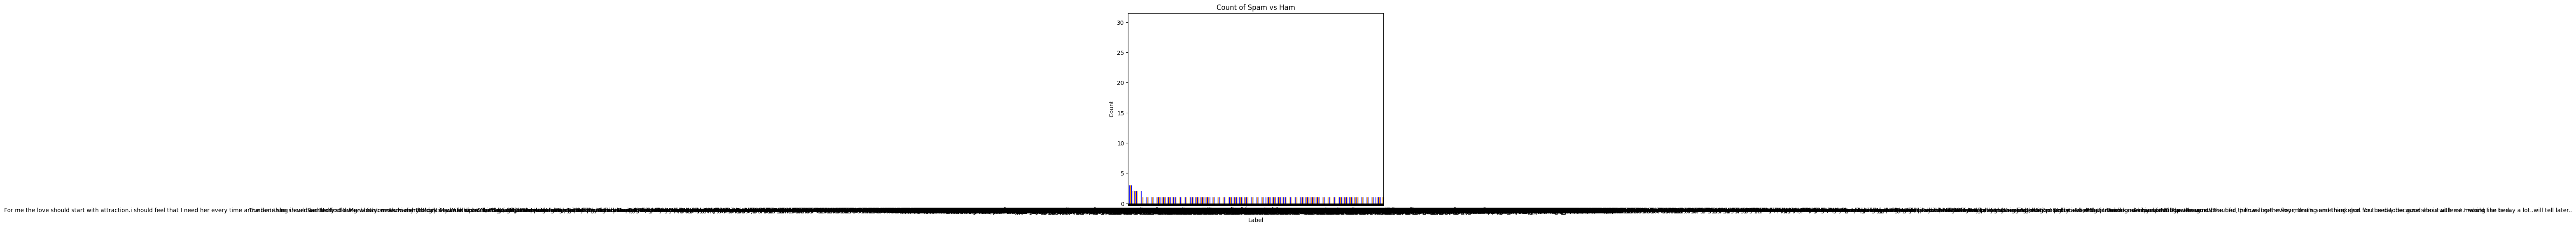

In [34]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = dataset['v2'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


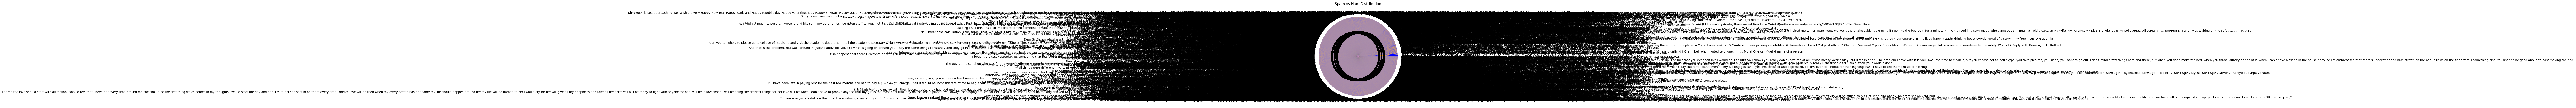

In [33]:
plt.figure(figsize=(8, 6))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Spam vs Ham Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()


#Model Built

In [34]:
model=MultinomialNB()#naive bayes
model.fit(feature_train,label_train)

MultinomialNB()

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


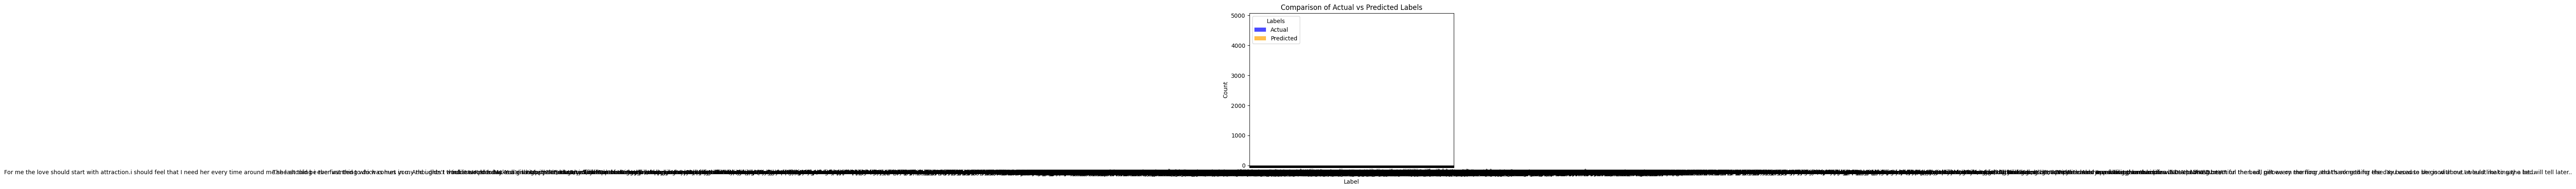

In [37]:
# Count the occurrences of each label
actual_counts = dataset['v2'].value_counts().sort_index()
predicted_counts = dataset['v1'].value_counts().sort_index()

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

# Plot the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Comparison of Actual vs Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Labels')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
# Check the unique values in your 'v2' column to identify the correct labels
print(dataset['v2'].unique())

# Adjust the labels accordingly, for example:
conf_matrix = confusion_matrix(dataset['v2'], dataset['v1'], labels=dataset['v2'].unique())

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual ' + str(label) for label in dataset['v2'].unique()],
                             columns=['Predicted ' + str(label) for label in dataset['v2'].unique()])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.draw()


In [35]:
label_pred=model.predict(feature_test)

In [36]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.91      0.96      0.94       145

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [39]:
print(m.confusion_matrix(label_test,label_pred))

[[957  13]
 [  6 139]]


In [40]:
model=SVC(kernel='linear')#SVC model
model.fit(feature_train,label_train)


SVC(kernel='linear')

In [41]:
label_pred=model.predict(feature_test)
m.accuracy_score(label_test,label_pred)

0.9838565022421525

In [42]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print(m.classification_report(label_test,label_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.97      0.90      0.94       145

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [45]:
print(m.confusion_matrix(label_test,label_pred))

[[966   4]
 [ 14 131]]


In [46]:
model=LogisticRegression()#logistic regression
model.fit(feature_train,label_train)

LogisticRegression()

In [47]:
label_pred=model.predict(feature_test)
m.accuracy_score(label_test,label_pred)


0.9856502242152466

In [48]:
label_pred


array([0, 0, 0, ..., 0, 0, 0])

In [49]:
label_test

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.99      0.90      0.94       145

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [51]:
print(m.confusion_matrix(label_test,label_pred))

[[969   1]
 [ 15 130]]


In [52]:
model=DecisionTreeClassifier()#decision tree
model.fit(feature_train,label_train)

DecisionTreeClassifier()

In [53]:

label_pred=model.predict(feature_test)
m.accuracy_score(label_test,label_pred)

0.9757847533632287

In [54]:
label_pred


array([0, 0, 0, ..., 0, 0, 0])

In [55]:
label_test


array([0, 0, 0, ..., 0, 0, 0])

In [56]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       970
           1       0.95      0.86      0.90       145

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115



In [57]:
print(m.confusion_matrix(label_test,label_pred))

[[964   6]
 [ 21 124]]



*   Logistic Regression have accuracy is 98.56%
*   Multinomial NB have accuracy is 98.29%
*   Support Vector classifer have accuracy is 98.38%
*   Decision tree have accuracy is 97.75%




